# Лабораторная работа 3
## Задача о падении тела. Построение графиков функций

## Куницкий Тимофей Александрович, 02.04.2025



In [20]:
import math
import numpy as np
import matplotlib.pyplot as plt
import relo
from matplotlib.animation import FuncAnimation
%matplotlib widget

In [21]:
n = 3 # количество вершин треугольника Рело
center = np.array([0.,0.]) # центр треугольника Рело
r = 10 # ширина треугольника Рело
N = 100 # количество точек для описания стороны треугольника Рело

In [22]:
relo_matrix = relo.regular_polygon_Relo(r=r, center=center, N=N)


(-5.538675134594813, 6.312177826491073, -5.5, 5.500000000000001)

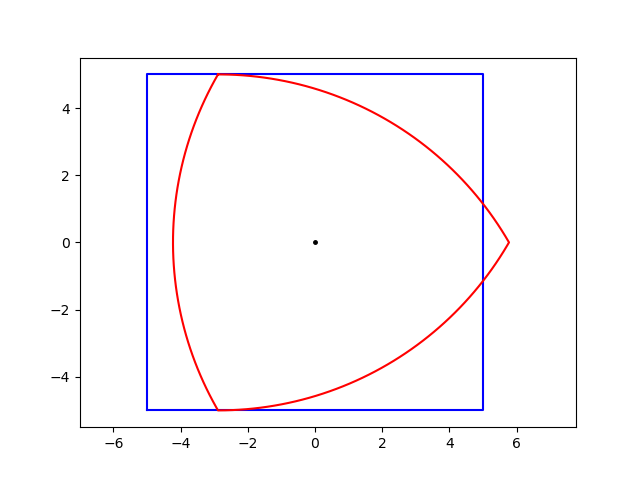

In [23]:

x1=-r/2
x2=r/2
y1=-r/2
y2=r/2
square = np.array([[x1, x1, x2,x2,x1], [y1,y2,y2,y1,y1]])
square=np.transpose(square)
plt.figure()
plt.plot(square[:,0],square[:,1],'b-')
plt.plot(relo_matrix[:,0],relo_matrix[:,1],'r-')
plt.plot(center[0],center[1],'k.',markersize=5)
plt.axis('equal')

(-5.5, 5.500000000000002, -5.5, 5.500000000000001)

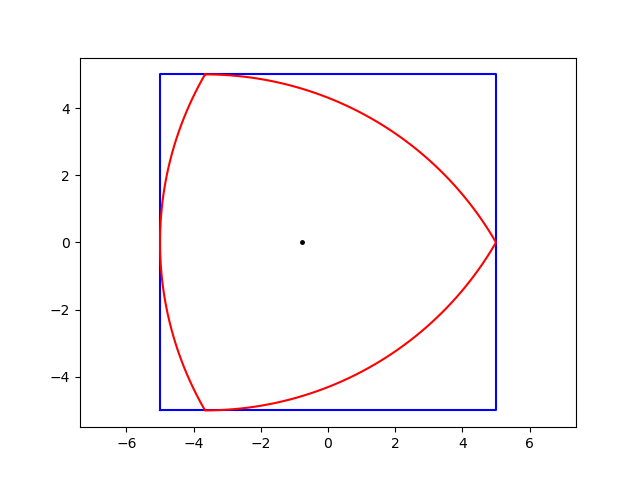

In [24]:
R = r/(2*np.sin(np.pi/n))
shift=np.array([R-(r/2),0])

relo_matrix_shifted = relo_matrix - shift
center -= shift

square = np.array([[x1, x1, x2,x2,x1], [y1,y2,y2,y1,y1]])
square=np.transpose(square)
plt.figure()
plt.plot(square[:,0],square[:,1],'b-')
plt.plot(relo_matrix_shifted[:,0],relo_matrix_shifted[:,1],'r-')
plt.plot(center[0],center[1],'k.',markersize=5)
plt.axis('equal')

(-5.5, 5.500000000000002, -5.5, 5.500000000000001)

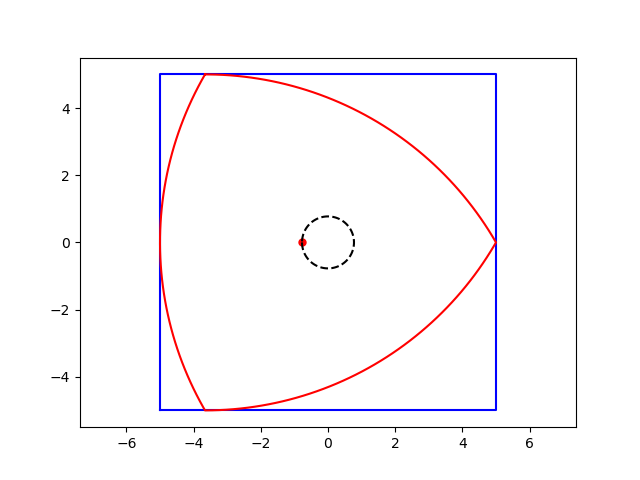

In [25]:
N_frames = 100

t_center = np.linspace(-np.pi, np.pi, N_frames)
center_frame = shift[0]*np.transpose([np.cos(t_center), np.sin(t_center)]) 
frame = 0
relo_matrix_shifted = relo_matrix + center_frame[frame]
plt.figure()
plt.plot(square[:,0],square[:,1],'b-')
plt.plot(relo_matrix_shifted[:,0],relo_matrix_shifted[:,1],'r-')
plt.plot(center_frame[frame,0],center_frame[frame,1],'r.',markersize=10)
plt.plot(center_frame[:,0],center_frame[:,1],'k--')
plt.axis('equal')


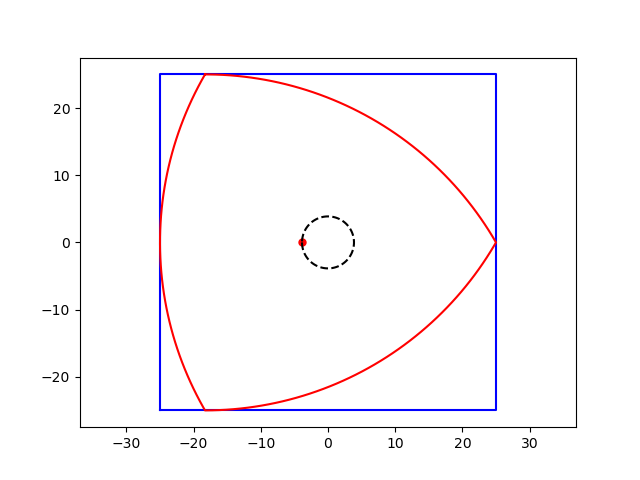

In [26]:
def draw_frame(r:int, N_frames:int, frame:int = 0) ->'plot':
    """ изображает кадр с номером frame при поступательном движении центра треугольника Рело по окружности против часовой стрелки"""
    #квадрат
    x1=-r/2
    x2=r/2
    y1=-r/2
    y2=r/2
    square = np.array([[x1, x1, x2,x2,x1], [y1,y2,y2,y1,y1]])
    square=np.transpose(square)
    #Треугольник Рело
    center=np.array([0.,0.])
    relo_matrix = relo.regular_polygon_Relo(r=r, center=center, N=N_frames)
    R = r/(2*np.sin(np.pi/n))
    shift=np.array([R-(r/2),0])
    #Анимация
    t_center = np.linspace(-np.pi, np.pi, N_frames)
    center_frame = shift[0]*np.transpose([np.cos(t_center), np.sin(t_center)]) 
    relo_matrix_shifted = relo_matrix + center_frame[frame]
    plt.plot(square[:,0],square[:,1],'b-')
    plt.plot(relo_matrix_shifted[:,0],relo_matrix_shifted[:,1],'r-')
    plt.plot(center_frame[frame,0],center_frame[frame,1],'r.',markersize=10)
    plt.plot(center_frame[:,0],center_frame[:,1],'k--')
    plt.axis('equal')
plt.figure()
draw_frame(50,100,0)

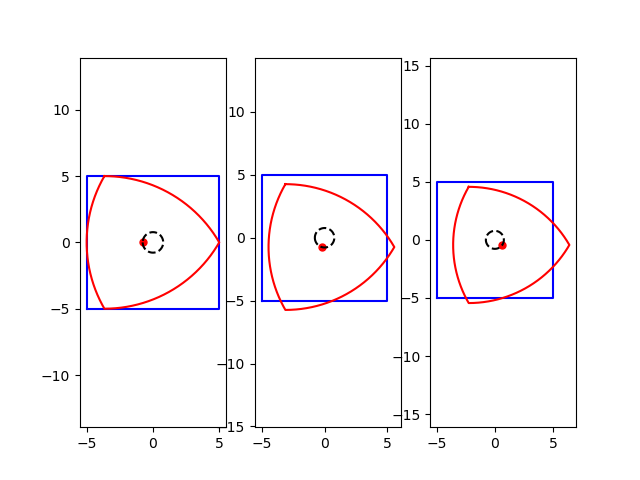

In [27]:
plt.figure()
N_frames = 100
plt.subplot(1,3,1)
draw_frame(r=r, N_frames=N_frames)
plt.subplot(1,3,2)
draw_frame(r=r, N_frames=N_frames, frame=20)
plt.subplot(1,3,3)
draw_frame(r=r, N_frames=N_frames, frame=40)

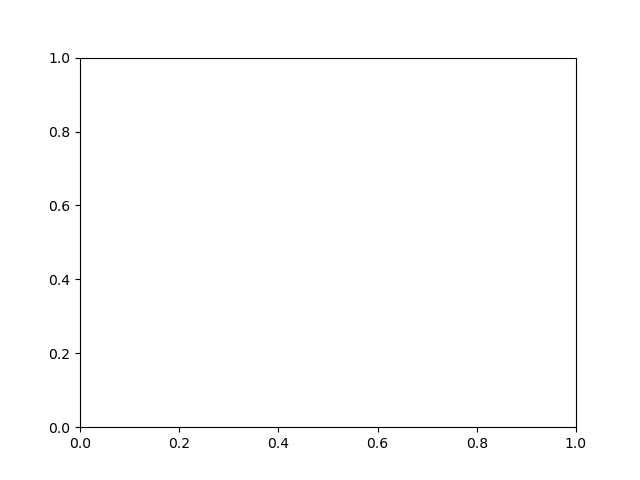

In [28]:


def at_frame2(frame):
    ax2.clear()  # Очищаем ось перед отрисовкой нового кадра
    draw_frame(r=r, N_frames=N_frames, frame=frame)  
fig2 = plt.figure()
ax2 = plt.axes()


FuncAnimation(fig2, at_frame2, frames=N_frames, 
repeat=False, interval=20)


In [29]:
plt.close('all')

In [30]:

rotate_matrix = lambda theta: np.array([[np.cos(theta), np.sin(theta)],[-np.sin(theta), np.cos(theta)]])
rotate_matrix(np.pi)

array([[-1.0000000e+00,  1.2246468e-16],
       [-1.2246468e-16, -1.0000000e+00]])

In [31]:
theta = 2*np.pi/3
matrix = rotate_matrix(theta)

In [35]:
relo_matrix_rotated = np.array([np.dot(matrix,row) for row in relo_matrix])


(-4.726350454318067, 6.273495698858847, -5.5, 5.500000000000001)

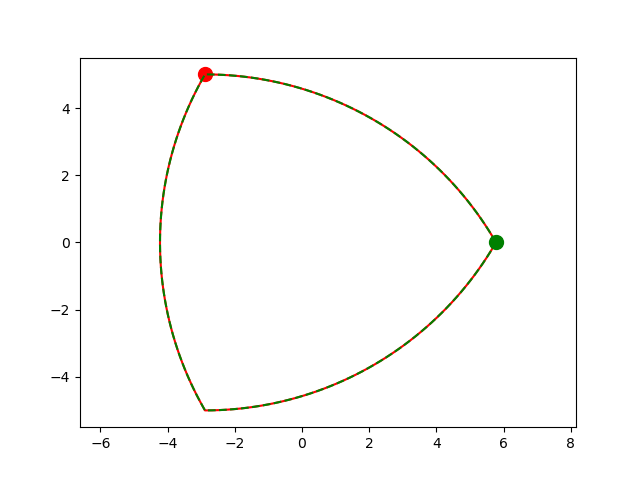

In [36]:
plt.figure()
plt.plot(relo_matrix[:,0],relo_matrix[:,1],'r-')
plt.plot(relo_matrix[0,0],relo_matrix[0,1],'r.',markersize=20)
plt.plot(relo_matrix_rotated[:,0],relo_matrix_rotated[:,1],'g--')
plt.plot(relo_matrix_rotated[0,0],relo_matrix_rotated[0,1],'g.',markersize=20)
plt.axis('equal')

In [37]:
theta = np.linspace(0, 2*np.pi/3, N_frames)

(-5.500069755193835, 5.500003321675897, -5.505999082493407, 5.500285670594924)

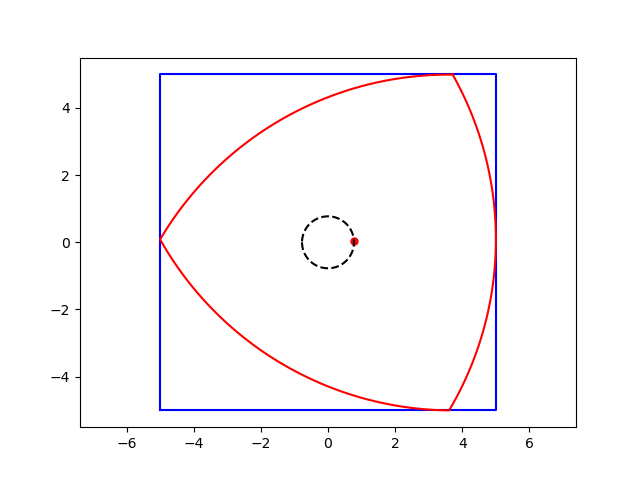

In [38]:
frame = 50
matrix = rotate_matrix(theta[frame])
relo_matrix_changed = (np.array([np.dot(matrix,row) for row in relo_matrix]) + center_frame[frame])
plt.figure()
plt.plot(square[:,0],square[:,1],'b-')
plt.plot(relo_matrix_changed[:,0],relo_matrix_changed[:,1],'r-')
plt.plot(center_frame[frame,0],center_frame[frame,1],'r.',markersize=10)
plt.plot(center_frame[:,0],center_frame[:,1],'k--')
plt.axis('equal')

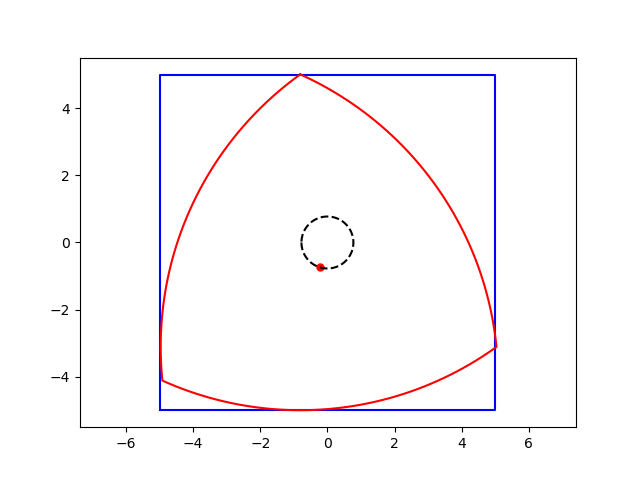

In [45]:
def draw_frame2(r:int, N_frames:int, frame:int = 0) ->'plot':
    """ изображает кадр с номером frame при поступательном движении центра треугольника Рело по окружности против часовой стрелки"""
    #квадрат
    x1=-r/2
    x2=r/2
    y1=-r/2
    y2=r/2
    square = np.array([[x1, x1, x2,x2,x1], [y1,y2,y2,y1,y1]])
    square=np.transpose(square)
    #Треугольник Рело
    center=np.array([0.,0.])
    relo_matrix = relo.regular_polygon_Relo(r=r, center=center, N=100)
    R = r/(2*np.sin(np.pi/n))
    shift=np.array([R-(r/2),0])
    #Анимация
    t_center = np.linspace(-np.pi, np.pi, N_frames)
    center_frame = shift[0]*np.transpose([np.cos(t_center), np.sin(t_center)]) 

    rotate_matrix = lambda theta: np.array([[np.cos(theta), np.sin(theta)],[-np.sin(theta), np.cos(theta)]])
    theta = np.linspace(0, 2*np.pi/3, N_frames)
    matrix = rotate_matrix(theta[frame])
    relo_matrix_changed = (np.array([np.dot(matrix,row) for row in relo_matrix]) + center_frame[frame])
    
    plt.plot(square[:,0],square[:,1],'b-')
    plt.plot(relo_matrix_changed[:,0],relo_matrix_changed[:,1],'r-')
    plt.plot(center_frame[frame,0],center_frame[frame,1],'r.',markersize=10)
    plt.plot(center_frame[:,0],center_frame[:,1],'k--')
    plt.axis('equal')
plt.figure()
draw_frame2(r=10,N_frames=100,frame=20)

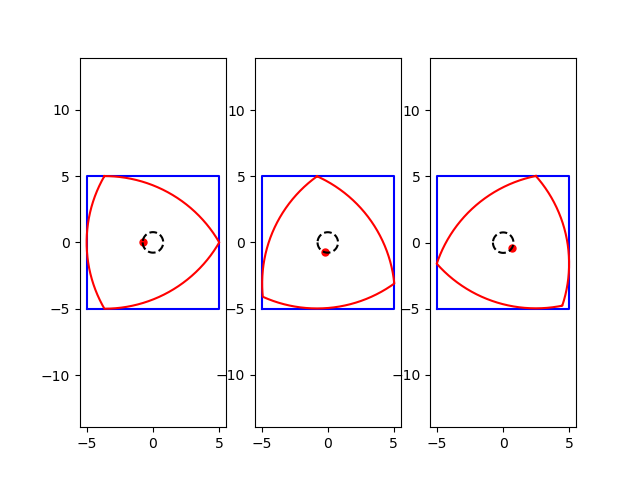

In [46]:
plt.figure()
plt.subplot(1,3,1)
draw_frame2(r=r, N_frames=N_frames)
plt.subplot(1,3,2)
draw_frame2(r=r, N_frames=N_frames, frame=20)
plt.subplot(1,3,3)
draw_frame2(r=r, N_frames=N_frames, frame=40)

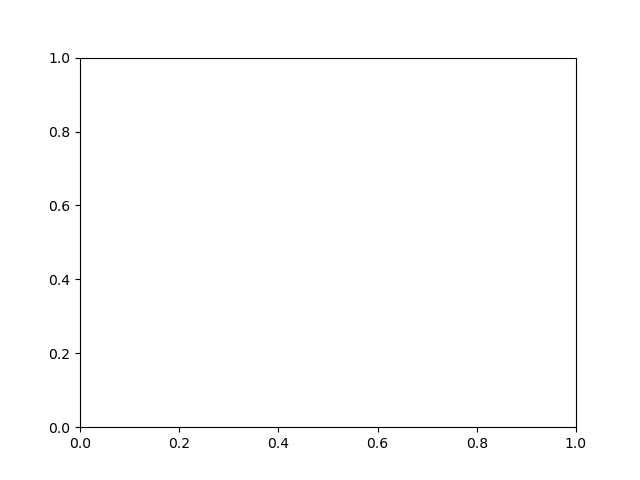

In [50]:
def at_frame3(frame):
    ax3.clear()  
    draw_frame2(r=r, N_frames=N_frames, frame=frame)  
fig3 = plt.figure()
ax3 = plt.axes()
FuncAnimation(fig3, at_frame3, frames=N_frames, 
repeat=False, interval=20)